In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib, json
from wordcloud import WordCloud
from bokeh.charts import Bar, output_file, show
from pandas import DataFrame

In [2]:
url = "http://api.pathofexile.com/ladders?id=Standard&limit=200"
response = urllib.urlopen(url)
data = json.loads(response.read())

In [3]:
classes = []
for i in range(0,199): classes.append((data['entries'][i]['character']['class'], 1))

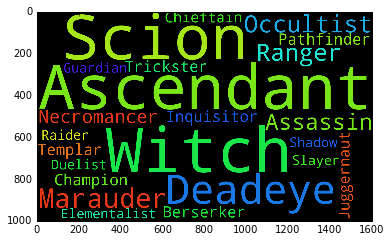

In [4]:
#Generate Word Cloud
words = ' '.join(word[0] for word in classes)
wordcloud = WordCloud(background_color = 'black',
                       width = 1600,
                       height = 1000
                      ).generate(words)
plt.imshow(wordcloud)

In [5]:
#Generate Bar Chart with Bookeh and Apche Spark + Pandas
classesChart = sc.parallelize(classes)
classesChart = sc.parallelize(classesChart.countByKey().items())

df = DataFrame(classesChart.takeOrdered(len(classesChart.countByKey().items()), key = lambda x: -x[1]), columns=['Classes', 'Number of Characters'])

p = Bar(df, label='Classes', values='Number of Characters',
        title="Path of Exile Standard Ladder", color="blue")

output_file("barStandardLadder.html")

show(p)